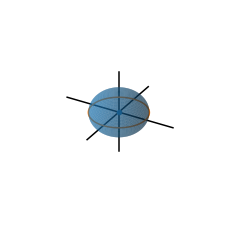

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

x_circ1 = np.cos(u)
y_circ1 = np.sin(u)
z_circ1 = np.zeros(len(y_circ1))

ax.plot_surface(x, y, z, linewidth=0.0, alpha=0.5)

ax.scatter3D(0,0,0, )
ax.plot3D([0,0],[-2,2],[0,0], color="k")
ax.plot3D([-2, 2], [0, 0], [0, 0], color="k")
ax.plot3D([0, 0], [0, 0], [-2, 2], color="k")
ax.plot3D(x_circ1, y_circ1, z_circ1)


ax.axis("off")

plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import torch
from pydicom import dcmread
import os
from dvh_from_structures import analyse_structures

In [13]:
data = "/Users/simongutwein/Studium/Masterarbeit/phantom_results"
phantoms = [x for x in os.listdir(data) if not x.startswith(".")]

results = []
for p in phantoms:
    pdir = os.path.join(data, p)
    models = [x for x in os.listdir(pdir) if not x.startswith(".")]
    
    for m in models:
        d = os.path.join(pdir, m)
        gamma = os.path.join(d, "gamma.txt")
        target = os.path.join(d, "target.pt")
        prediction = os.path.join(d, "prediction.pt")
        model = m.split("_")[0]
        pos = int(p.split("P")[1][:3])

        p_dose = np.array(torch.load(prediction))
        t_dose = np.array(torch.load(target))

        with open(gamma, "r") as fin:
            gamma = fin.readlines()[4]
            results.append({
                "pos": pos,
                "model": model,
                "gamma": float(gamma),
                "z_p": p_dose[:,256,100],
                "z_t": t_dose[:, 256, 100],
                "x_p": p_dose[pos+100,:, 100],
                "x_t": t_dose[pos+100, :, 100],
                "y_p": p_dose[pos+100, 256, :],
                "y_t": t_dose[pos+100, 256, :],
            })
        

In [40]:

r = pd.DataFrame(results)
print(r[["pos", "model", "gamma"]])
r.keys()


   pos     model   gamma
0  100  prostate  56.080
1  100     mixed  60.122
2  200  prostate  27.713
3  200     mixed  45.539
4  300  prostate  19.246
5  300     mixed  48.427


Index(['pos', 'model', 'gamma', 'z_p', 'z_t', 'x_p', 'x_t', 'y_p', 'y_t'], dtype='object')

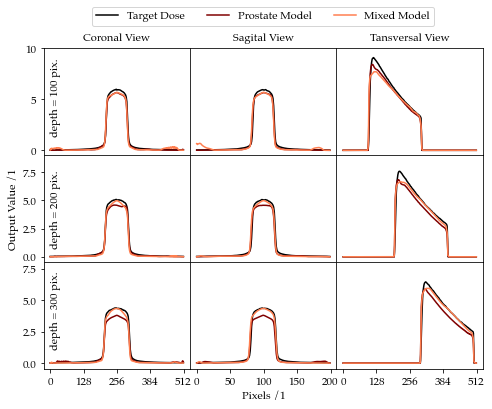

In [64]:
@latex(width=20, height=15, path="/Users/simongutwein/Desktop/quer.pdf")
def plot_2():

    pos = r["pos"].unique()
    fig, ax = plt.subplots(3, 3, figsize=(12, 8))

    maxs = [10, 9, 8]

    for num ,p in enumerate(pos):
        tmp = r[r["pos"]==p]

        ax[num,0].plot(tmp.iloc[0]["x_t"], color="Black")
        ax[num,0].plot(tmp.iloc[0]["x_p"], color="Maroon")
        ax[num,0].plot(tmp.iloc[1]["x_p"], color="Coral")
        ax[num,0].set_ylim([-.5, maxs[num]])
        ax[num,0].set_xticks([0, 128, 256, 384, 512])
        ax[num, 0].axes.get_xaxis().set_visible(False)


        ax[num,1].plot(tmp.iloc[0]["y_t"], color="Black")
        ax[num,1].plot(tmp.iloc[0]["y_p"], color="Maroon")
        ax[num,1].plot(tmp.iloc[1]["y_p"], color="Coral")
        ax[num, 1].set_ylim([-.5, maxs[num]])
        ax[num,1].set_xticks([0,50, 100, 150 ,200])
        ax[num,1].axes.get_yaxis().set_visible(False)
        ax[num, 1].axes.get_xaxis().set_visible(False)



        ax[num,2].plot(tmp.iloc[0]["z_t"], color="Black")
        ax[num,2].plot(tmp.iloc[0]["z_p"], color="Maroon")
        ax[num,2].plot(tmp.iloc[1]["z_p"], color="Coral")
        ax[num, 2].set_ylim([-.5, maxs[num]])
        ax[num,2].set_xticks([0, 128, 256, 384, 512])
        ax[num,2].axes.get_yaxis().set_visible(False)
        ax[num, 2].axes.get_xaxis().set_visible(False)

    ax[0, 0].text(256,11,"Coronal View", va="center",ha="center")
    ax[0, 1].text(100, 11, "Sagital View", va="center", ha="center")
    ax[0, 2].text(256, 11, "Tansversal View", va="center", ha="center")
    ax[2, 0].axes.get_xaxis().set_visible(True)
    ax[2, 1].axes.get_xaxis().set_visible(True)
    ax[2, 2].axes.get_xaxis().set_visible(True)
    ax[2,1].set_xlabel("Pixels /1")
    ax[1,0].set_ylabel("Output Value /1")

    ax[0, 0].text(20, ax[0,0].get_ylim()[1]//2+0.2, "depth = 100 pix.", va="center", ha="center", rotation=90)
    ax[1, 0].text(20, ax[1,0].get_ylim()[1]//2+0.2, "depth = 200 pix.", va="center", ha="center",rotation=90)
    ax[2, 0].text(20, ax[2,0].get_ylim()[1]//2+0.2, "depth = 300 pix.", va="center", ha="center", rotation=90)


    legend = ["Target Dose", "Prostate Model", "Mixed Model"]
    ax[0,1].legend(legend, bbox_to_anchor=(0.5, 1.3), borderaxespad=0, loc="center", ncol=3)
    plt.subplots_adjust(wspace=0, hspace=0)

    return fig

plot_2()


In [6]:
def latex(width, height, path):
    '''Decorator that sets latex parameters for plt'''
    def do_latex(func):
        def wrap(*args, **kwargs):

            plt.rcParams["font.family"] = "serif"
            plt.rcParams["font.serif"] = "Palatino"
            plt.rcParams["font.size"] = 11
            fig = func(*args, **kwargs)
            cm = 1/2.54
            fig.set_size_inches(width*cm, height*cm, forward=True)
            plt.savefig(path, dpi=300, bbox_inches='tight')
        return wrap
    return do_latex


In [28]:
root_dir = "/Users/simongutwein/Desktop/prostate_dvh"
ct_file = os.path.join(root_dir, "CT_image0.dcm")
structure_file = os.path.join(root_dir, "pt3_strctr.dcm")
target_dose = np.array(torch.load(os.path.join(root_dir, "target.pt")))
prediction_dose=np.array(torch.load(os.path.join(root_dir, "prediction.pt")))

with dcmread(ct_file, force=True) as fin:
    origin = np.array(fin.ImagePositionPatient).astype(float)
    px_sp = fin.PixelSpacing
    px_sp.append(3)
    px_sp = np.array(px_sp).astype(float)
    print(origin, px_sp)


[-300.  -256.2 -385.1] [1.171875 1.171875 3.      ]


In [29]:
structures = analyse_structures(structure_file, origin, px_sp, target_dose.shape, target_dose, prediction_dose)

100%|██████████| 31/31 [00:08<00:00,  3.66it/s]


In [30]:
plot_strucs = ["patient", "rectum", "ctv", "bladder", "ptv", "analcanal", "seminal"]

strucs = []
for struc in structures:
    if any(x in struc["struc_name"].lower() for x in plot_strucs):
        strucs.append(struc)

patient
Bladder
AnalCanal
Rectum
SeminalVesc
CTV_P
PTV_60
PTV_57_6


/var/folders/mb/3n21yy1n3c733_bvg_x9b2_m0000gn/T/ipykernel_6599/3196915402.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(-20,101,20)))


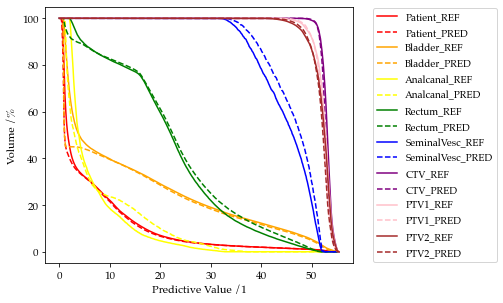

In [38]:
@latex(width=14, height=12, path="/Users/simongutwein/Desktop/dvh.pdf")
def plot():
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    colorList = ['red', 'orange', 'yellow', 'green', 'blue',
                'purple', 'pink', 'brown', 'gray', 'gold']

    legends = ["Patient", "Bladder", "Analcanal", "Rectum", "SeminalVesc", "CTV", "PTV1", "PTV2"]

    legend = []
    for num, struc in enumerate(strucs):
        print(struc["struc_name"])

        ax.plot(struc["dvh_x"], struc["target_dvh"], color=colorList[num])
        ax.plot(struc["dvh_x"], struc["prediction_dvh"], "--", color=colorList[num])
        legend.append(legends[num] + "_REF")
        legend.append(legends[num] + "_PRED")

    ax.legend(legend, bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)
    ax.set_ylabel("Volume /%")
    ax.set_xlabel("Predictive Value /1")
    ax.set_yticklabels(list(range(-20,101,20)))
    return fig

plot()
